# Introduction to JAX

This script will present the main functions from JAX that will be used during the research project, in order to optimize the code.

## Packages

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import utils as ut

## Trying JIT and Grad function

In [4]:
# Creating an array to test jit.
seed = 0
key = random.PRNGKey(seed)
data = random.normal(key, (1000000,))

# Defining a random function.
def f(x):
    return jnp.exp(x)**2 / jnp.exp(3) * jnp. exp(x**2)

# Using jit function.
f_jit = jit(f)

#ploting the elapsed time.
print('non-jit version:')
%timeit f(data)
print('jit version:')
%timeit f_jit(data)

# the more complicated the function, the higher it is the difference between f and f_jit.

non-jit version:
4.16 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
jit version:
488 µs ± 61.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


grad of function f(x):

48.6 ms ± 3.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 6.54 times longer than the fastest. This could mean that an intermediate result is being cached.
5.42 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


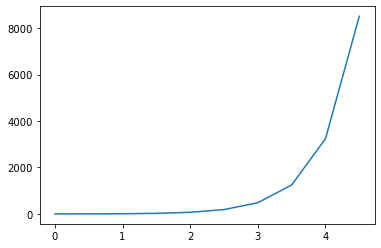

In [32]:
# The use of lambda functions makes it easier to use grad().
g = lambda x: jnp.exp(x)**2 + x**4
x = jnp.arange(0.,5.,0.5)

# the grad functions from jax only works for scalar functions.
g_grad = grad(g)

def grad_jax(x):   
    h = jnp.zeros(len(x))
    for i in range(0, len(x)):
        h = h.at[i].set(g_grad(x[i]))
    return h

grad_jax_jit = jit(grad_jax)

%timeit grad_jax(x)
%timeit grad_jax_jit(x)

grad of function f(x,y):

In [6]:
g = lambda x, y: 5*x*y + 7*y
x = jnp.arange(0.,5.,1.)
y = jnp.arange(0.,5.,1.)

print(x)
print(y)

g_grad_x = grad(g)
g_grad_y = grad(g, argnums=(1))

# Function that computes the grad of a function in regards of x.
def grad_x(x):   
    h = jnp.zeros((np.size(x), np.size(y)))
    for i in range(0, np.size(x)):
        for j in range(0, np.size(y)):
            h = h.at[i,j].set(g_grad_x(x[i],y[j]))
    return h

# Function that computes the grad of a function in regards of y.
def grad_y(x):   
    h = jnp.zeros((np.size(x), np.size(y)))
    for i in range(0, np.size(x)):
        for j in range(0, np.size(y)):
            h = h.at[i,j].set(g_grad_y(x[i],y[j]))
    return h


print(grad_x(x))
print(grad_y(y))

# The function grad computes the derivative of a scalar function at one point, if we have multiple points, another
# function that will compute the grad for each point of the array had to be implemented. That is not optimum since
# it is good to avoid loops. VMAP function will be disussed.


[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
[[ 0.  5. 10. 15. 20.]
 [ 0.  5. 10. 15. 20.]
 [ 0.  5. 10. 15. 20.]
 [ 0.  5. 10. 15. 20.]
 [ 0.  5. 10. 15. 20.]]
[[ 7.  7.  7.  7.  7.]
 [12. 12. 12. 12. 12.]
 [17. 17. 17. 17. 17.]
 [22. 22. 22. 22. 22.]
 [27. 27. 27. 27. 27.]]


## Using VMAP function

In [31]:
# When using vmap, it is necessary to implement a function to treat a single data. Instead of creating another function
# with a loop, vmap allow the treatment of batches of data from a single data function.

f = lambda x: 5*x**2
x = jnp.arange(0.,5.,1.)

# grad function is a single data function.
f_grad = grad(f)
print(f_grad(x[1]))

# Using the functions above
print(derivative_jax(f,x[1],0))

# Function without using vmap.
def grad_loop(x):   
    h = jnp.zeros(len(x))
    for i in range(0, len(x)):
        h = h.at[i].set(f_grad(x[i]))
    return h      

# Function using vmap.
def vmap_grad(x):
    return vmap(f_grad)(x)

print('time elapsed using a loop:')
%timeit grad_loop(x)

print('time elapsed using vmap:')
%timeit vmap_grad(x)

jit_vmap_grad = jit(vmap_grad)

print('time elapsed using jit and vmap:')
%timeit jit_vmap_grad(x)

10.0
10.0
time elapsed using a loop:
17.5 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
time elapsed using vmap:
3.46 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
time elapsed using jit and vmap:
2.25 µs ± 508 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
